# Drama Reviews Sentiment Analysis

**Problem Statement:** Given drama reviews from mydramalist, the task is to predict whether a review contains positive, neutral or negative sentiment about the drama. This is a supervised learning task, where given a string of review text, we have to categorise them into predefined categories based on rating.

**Solution:** After retrieving the reviews from the website, I have preprocessed the reviews text, as well as conduct exploratory data analysis on the ratings and the reviews. Here, I convert the text to numerical representation in order to be trained by a machine learning algorithm. Then, the algorithm will train and test the drama reviews sentiment.

## 1. Import libraries and load CSV file

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('drama_reviews_processed.csv')

In [3]:
df.head()

,drama_title,user_name,overall_rating,story_rating,cast_rating,music_rating,rewatch_value_rating,reviews,sentiment,reviews_processed,language,reviews_processed2x,reviews_lemmatized
0,Dear My Friends (2016),iamgeralddd,10.0,10.0,10.0,10.0,10.0,Thank you writer Noh for making this heart-wa...,1,thank you writer noh for making this heart war...,en,thank writer noh making heart warming story co...,heart warming story live drama excited weekend...
1,Dear My Friends (2016),Dounie,10.0,10.0,10.0,8.5,9.0,"I know for some, stories following and tellin...",1,i know for some stories following and telling ...,en,know stories following telling lives older peo...,story old people promise boring decide try fun...
2,Dear My Friends (2016),Pelin,10.0,10.0,10.0,10.0,10.0,"Story ""A realistic, cheerful story about “twi...",1,story a realistic cheerful story about twiligh...,en,story realistic cheerful story twilight youths...,story realistic cheerful story twilight young ...
3,Dear My Friends (2016),silent_whispers,9.0,9.0,10.0,10.0,7.0,When I heard about a drama that would be comi...,1,when i heard about a drama that would be comin...,en,heard drama would coming 2016 twilight youths ...,drama twilight youth life long friend drama lo...
4,Dear My Friends (2016),Dana,9.0,9.0,10.0,7.0,3.0,In a sometimes overwhelming world of perfect ...,1,in a sometimes overwhelming world of perfect f...,en,sometimes overwhelming world perfect faces scr...,overwhelming world perfect script dear friend ...


## 2. Vectorization - Term Frequency & Inverse Document Frequency (TF-IDF)

From the exploratory data analysis, we found that the words "drama", "story" and "character" appeared very often. However, these common words may not be helpful in classification. Thus, TF-IDF is used to increase the significance of words that appear frequently in a document while decreasing the importance of common words that appear across all documents.

TF-IDF is calculated as:
- TF  = (Frequency of a word in doc)/(Total words in the doc)
- IDF = Log((Total number of docs)/(Number of docs containing the word))

df['reviews_processed'] is used here since the TfidfVectorizer in Scikit-Learn will factor in these stopwords.

In [4]:
processed_features = df['reviews_processed']

In [5]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

## 3. Split data into train and test sets

In [6]:
labels = df['sentiment']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=42)

## 4. Random Forest Classifier

The Random Forest algorithm is an ensemble of many decision trees. An ensemble technique aggregates the outcome of individual predictions to get a better result and reduce overfitting. Random Forest is trained by bagging. Subsets of the training data are randomly sampled, fitted and the predicted outputs are aggregated. Sampling is done with replacement.

### 4.1 Train model

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### 4.2 Make predictions and evaluate model

In [9]:
y_pred = rfc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  51    0  177]
 [   0   35   97]
 [   0    0 4647]]
              precision    recall  f1-score   support

          -1       1.00      0.22      0.37       228
           0       1.00      0.27      0.42       132
           1       0.94      1.00      0.97      4647

    accuracy                           0.95      5007
   macro avg       0.98      0.50      0.59      5007
weighted avg       0.95      0.95      0.93      5007

0.945276612742161


The acurracy level does not reveal the effectiveness of the model as the size of the positive sentiment class outweighs the negative and neutral sentiment classes. Thus, we look into other metrics to identify the effectiveness of the model.

From the confusion matrix, we can see that there is a high proportion of negative reviews (177/228) wrongly predicted as positive reviews. Although a similarly high proportion of neutral reviews (97/132) were wrongly predicted as positive reviews, a rating of 5.0/10.0 would be considered positive under a binary classification problem of negative or positive reviews. As such, a binary classification task could be tested as well.

It is noteworthy to say that the precision values are high, meaning to say that there is a high propotion of true positives relative to false positives. Yet, recall score is sacrificed. A high proportion of negative and neutral reviews were wrongly classified.

## 5. Logistic Regression

Logistic Regression is a classification algorithm, which predicts the probability that an input belong to a particular category. The Logistic Regression models data using the sigmoid function, g(z)=1/(1+e^-z).

### 5.1 Train model

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 5.2 Make predictions and evaluate model

In [13]:
y_pred = lr.predict(X_test)

In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  36    0  192]
 [   4    0  128]
 [   9    0 4638]]
              precision    recall  f1-score   support

          -1       0.73      0.16      0.26       228
           0       0.00      0.00      0.00       132
           1       0.94      1.00      0.97      4647

    accuracy                           0.93      5007
   macro avg       0.56      0.39      0.41      5007
weighted avg       0.90      0.93      0.91      5007

0.9334931096464949


C:\Users\weich\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Although accuracy is almost as high as the one given by the random forest algorithm, closer analysis is needed to evaluate the effectiveness of the logistic regression model.

The precision and recall scores of positive reviews are high, while that of negative and neutral reviews are significantly lower. This could be contributed to the fact that none of the neutral reviews were correctly predicted. 

## 6. Support Vector Machine

Support Vector Machine algorithms find the hyperplane that best divides the dataset into its classes. Support Vectors are the data points nearest to the hyperplane, which changes the hyperplane position if removed.

### 6.1 Train model

In [15]:
from sklearn import svm

svm = svm.LinearSVC(random_state=42)
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### 6.2 Make predictions and evaluate model

In [21]:
y_pred = svm.predict(X_test)

In [22]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  95   10  123]
 [   9   16  107]
 [  49   16 4582]]
              precision    recall  f1-score   support

          -1       0.62      0.42      0.50       228
           0       0.38      0.12      0.18       132
           1       0.95      0.99      0.97      4647

    accuracy                           0.94      5007
   macro avg       0.65      0.51      0.55      5007
weighted avg       0.92      0.94      0.93      5007

0.9372877970840823


The results of the support vector machine seem to be rather similar to that of the logistic regression, with high precision and recall scores for positive reviews, and lower scores for negative and neutral reviews.

## 7. K-Nearest Neighbors

K-Nearest Neighbors algorithm classifies data into classes based on a similiarity measure.

### 7.1 Train model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 7.2 Make predictions and evaluate model

In [19]:
y_pred = knn.predict(X_test)

In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  25    6  197]
 [   7    3  122]
 [  18   10 4619]]
              precision    recall  f1-score   support

          -1       0.50      0.11      0.18       228
           0       0.16      0.02      0.04       132
           1       0.94      0.99      0.96      4647

    accuracy                           0.93      5007
   macro avg       0.53      0.38      0.39      5007
weighted avg       0.90      0.93      0.90      5007

0.9281006590772918


Again, the k-nearest neighbors algorithm give high precision and recall scores for positive reviews and lower scores for negative and neutral reviews.

## 8. Hyperparameter Tuning - Random Forest Classifier

Despite the high accuracy and precision scores for the random forest classifier, the best parameters may not have been selected. As such, a **Grid Search Cross Validation** would be used to identify the best parameters.

In [11]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_jobs=-1,n_estimators=200, oob_score = True, random_state=42) 

param_grid = { 
    'n_estimators': [200, 400, 600],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=True, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_fe

In [12]:
CV_rfc.best_params_ # best parameters of grid search

{'max_features': 'auto', 'n_estimators': 200}

In [13]:
best_rfc = CV_rfc.best_estimator_
y_pred = best_rfc.predict(X_test)

In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  51    0  177]
 [   0   35   97]
 [   0    0 4647]]
              precision    recall  f1-score   support

          -1       1.00      0.22      0.37       228
           0       1.00      0.27      0.42       132
           1       0.94      1.00      0.97      4647

    accuracy                           0.95      5007
   macro avg       0.98      0.50      0.59      5007
weighted avg       0.95      0.95      0.93      5007

0.945276612742161


Of the parameters I tested, the best parameters are the same as the Random Forest Classifier I had tried earlier. 

For further analysis, I will make two changes and use the Random Forest Classifier to train and predict the sentiments again.

## 9. Binary Class & Down Sample the Majority Class

Since the Random Forest Classifier predicted a huge proportion of neutral sentiments as positive, I combined the neutral and positive sentiments into one class - positive. Thus, this will be a binary classification problem.

In addition, accuracy was not a good indicator of model effectiveness as the size of the positive sentiment class far outweighs the negative class. Thus, I will down sample the majority positive class.

### 9.1 Convert data to binary class

In [19]:
def label_sentiment(row): # label sentiment according to overall rating
    if row['overall_rating'] < 5.0:
        return 0 # 0 means negative rating
    return 1 # 1 means positive rating

df['sentiment'] = df.apply(lambda row: label_sentiment(row), axis=1)

In [20]:
df['sentiment'].value_counts() # data is skewed

1    23867
0     1167
Name: sentiment, dtype: int64

### 9.2 Down sample positive sentiment reviews

In [24]:
from sklearn.utils import resample

df_majority = df[df['sentiment']==1] # Separate majority and minority classes
df_minority = df[df['sentiment']==0]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_majority_downsampled, df_minority]) # Combine minority class with downsampled majority class
df_downsampled['sentiment'].value_counts()

1    1167
0    1167
Name: sentiment, dtype: int64

## 10. Random Forest Classifier with best parameters

The downsampled data is then trained with the random forest classifier and its best parameters.

### 10.1 Vectorization

In [25]:
processed_features = df_downsampled['reviews_processed']

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english')) # vectorization
processed_features = vectorizer.fit_transform(processed_features).toarray()

### 10.2 Split data into train and test sets

In [26]:
labels = df_downsampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=42) 
#split train and test sets

### 10.3 Train Random Forest Classifier with the best parameters

In [27]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### 10.4 Make predictions and evaluate model

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[205  30]
 [ 49 183]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       235
           1       0.86      0.79      0.82       232

    accuracy                           0.83       467
   macro avg       0.83      0.83      0.83       467
weighted avg       0.83      0.83      0.83       467

0.8308351177730193


The accuracy score now gives a better view on the effectiveness of the model. The precision and recall scores are roughly similar as well. 

### 10.5 Receiver Operating Characteristics curve

To view the trade-off between sensitivity and specificity, we can use the Receiver Operating Characteristics curve. This allows us to choose a threshold that balances sensitivity and specificity. Sensitivity is the true positive rate while specificity is the true negative rate.

In [ ]:
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

y_probs = rfc.predict_proba(X_test)
y_pred_probs = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [35]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

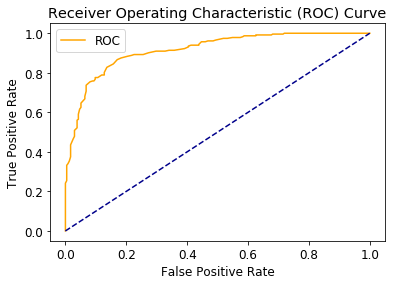

In [36]:
plot_roc_curve(fpr, tpr)

The steep curve reveals a positive sign. We are maximising the true positive rate while minimising the false positive rate.

In [37]:
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9150678650036683


The target value for Area Under Curve (AUC) is 1, and this model gives a value of 0.915 - pretty close!

## 11. Closing Thoughts

This is the first end-to-end project that I did, from getting the data, processing it and training machine learning algorithm for a classification project. I struggled with data retrieval as I had not learnt web scraping before. It was a challenge putting the data into a DataFrame as it tested my for loop and regular expression skills. 

Data pre-processing was almost as challenging. The first time I did it gave funny words like "gth", "seriesi" "hormones" and even "shitpeace" as most commonly occuring words for the negative sentiments! It took several iterations back and forth between data pre-processing and exploratory data analysis to get it right.

I am thoroughly thankful that this mini project I have worked on for close to a month has come to fruition. 

